In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the Boston Housing dataset

synthetic_data_path = 'normalized_A1_synthetic.csv'
synthetic_data = pd.read_csv(synthetic_data_path)


In [3]:
synthetic_data

,#v1,v2,v3,v4,v5,v6,v7,v8,v9,z
0,1.280663,-0.793451,1.616521,1.004039,-0.676741,2.553385,-0.466353,-0.674985,1.886479,1.416377
1,0.109896,1.522669,-0.154310,-0.992534,0.008298,1.684637,-0.344116,-0.674985,-0.358487,-0.323709
2,-1.172442,-0.062932,-0.964088,-0.877683,0.109029,1.335112,0.121703,1.481516,-0.967034,-0.820304
3,-1.640673,0.863717,1.460254,0.860615,1.196895,0.572846,0.973119,-0.674985,1.869298,1.715855
4,-1.496693,-1.521392,-0.693229,-1.218331,-0.559655,0.323990,-0.190274,-0.674985,-0.849809,-1.158785
...,...,...,...,...,...,...,...,...,...,...
995,0.099424,-0.750553,1.417162,1.301308,-0.287760,1.800923,-0.099780,-0.674985,1.548482,1.275861
996,-0.563491,1.085504,1.684789,0.685041,1.536128,1.853633,1.239758,-0.674985,2.338810,2.264547
997,0.087321,-0.319089,1.015371,1.174267,0.141693,-1.454970,0.219954,-0.674985,0.965079,1.214365
998,1.545773,-1.255938,-1.590255,-1.002285,-0.036156,0.919590,0.260521,-0.674985,-1.147063,-1.246925


In [4]:
# Normalize the data using Min-Max scaling
min_max_scaler = MinMaxScaler()
synthetic_data_normalized = pd.DataFrame(min_max_scaler.fit_transform(synthetic_data), columns=synthetic_data.columns)


In [5]:
# Extract features (X) and target variable (y)
X = synthetic_data.drop('z', axis=1).values
y = synthetic_data['z'].values


   Variables:
        L: Number of layers is represented by self.L.
        n: The array with the number of units in each layer is represented by self.n.
        xi: The array of arrays for activations is represented by self.xi.
        w: The array of matrices for weights is represented by self.w.
        theta: The array of arrays for thresholds is represented by self.theta.
        delta: The array of arrays for the propagation of errors is represented by self.delta.
        d_w: The array of matrices for the changes of weights is represented by self.d_w.
        d_theta: The array of arrays for the changes of thresholds is represented by self.d_theta.
        d_w_prev: The array of matrices for the previous changes of weights is represented by self.d_w_prev.
        d_theta_prev: The array of arrays for the previous changes of thresholds is represented by self.d_theta_prev.
        fact: The activation function name is stored in self.activation.

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class MyNeuralNetwork:            
    def __init__(self, layers, learning_rate, momentum, activation, validation_percentage=0):
        self.L = len(layers)
        self.n = layers.copy()
        self.xi = [np.zeros(l) for l in layers]
        self.w = [np.random.randn(layers[i], layers[i-1]) for i in range(1, self.L)]
        self.theta = [np.zeros(l) for l in layers]
        self.delta = [np.zeros(l) for l in layers]
        self.d_w = [np.zeros_like(w) for w in self.w]
        self.d_theta = [np.zeros_like(t) for t in self.theta]
        self.d_w_prev = [np.zeros_like(w) for w in self.w]
        self.d_theta_prev = [np.zeros_like(t) for t in self.theta]
        self.learning_rate = learning_rate 
        self.momentum = momentum 
        self.activation = activation
        self.validation_percentage = validation_percentage
        self.loss_epochs = []

    def activation_function(self, x):
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif self.activation == 'relu':
            return np.maximum(0, x)
        elif self.activation == 'linear':
            return x
        elif self.activation == 'tanh':
            return np.tanh(x)
        else:
            raise ValueError("Invalid activation function")

    def activation_derivative(self, x):
        if self.activation == 'sigmoid':
            return x * (1 - x)
        elif self.activation == 'relu':
            return np.where(x > 0, 1, 0)
        elif self.activation == 'linear':
            return 1
        elif self.activation == 'tanh':
            return 1 - x**2
        else:
            raise ValueError("Invalid activation function")

    def forward_pass(self, x):
        self.xi[0] = x
        for i in range(1, self.L):
            self.xi[i] = self.activation_function(np.dot(self.w[i-1], self.xi[i-1]) - self.theta[i])

    def backward_pass(self, y):
        self.delta[-1] = (self.xi[-1] - y) * self.activation_derivative(self.xi[-1])
        for i in range(self.L - 2, 0, -1):
            self.delta[i] = np.dot(self.w[i].T, self.delta[i+1]) * self.activation_derivative(self.xi[i])

    def update_weights(self):
        for i in range(1, self.L):
            self.d_w[i-1] = self.learning_rate * np.outer(self.delta[i], self.xi[i-1]) + self.momentum * self.d_w_prev[i-1]
            self.d_theta[i] = self.learning_rate * self.delta[i] + self.momentum * self.d_theta_prev[i]
            self.w[i-1] -= self.d_w[i-1]
            self.theta[i] -= self.d_theta[i]
            self.d_w_prev[i-1] = self.d_w[i-1]
            self.d_theta_prev[i] = self.d_theta[i]
            
    def mape(self, y_true, y_pred):
        mask = y_true != 0
        return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

    def fit(self, X, y, epochs, batch_size=32, learning_rate_decay=0.1):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=self.validation_percentage, random_state=42)

        loss_epochs = []

        for epoch in range(epochs):
            for _ in range(0, len(X_train), batch_size):
                batch_indices = np.random.choice(len(X_train), batch_size, replace=False)
                X_batch, y_batch = X_train[batch_indices], y_train[batch_indices]

                for i in range(len(X_batch)):
                    x_sample, y_sample = X_batch[i], y_batch[i]
                    self.forward_pass(x_sample)
                    self.backward_pass(y_sample)
                    self.update_weights()

                # Calculate training error (MSE), MAPE, and R2
                train_predictions = self.predict(X_train)
                training_error = mean_squared_error(y_train, train_predictions)
                training_mape = self.mape(y_train, train_predictions)
                training_r2 = r2_score(y_train, train_predictions)

                # Calculate validation error (MSE), MAPE, and R2
                val_predictions = self.predict(X_val)
                validation_error = mean_squared_error(y_val, val_predictions)
                validation_mape = self.mape(y_val, val_predictions)
                validation_r2 = r2_score(y_val, val_predictions)

                self.loss_epochs.append([training_error, validation_error, training_mape, validation_mape])

                # Print values during training
                if epoch % 10 == 0:
                    print(f"Epoch {epoch}/{epochs} - Training Error: {training_error}, Validation Error: {validation_error}, Training MAPE: {training_mape}, Validation MAPE: {validation_mape}, Training R2: {training_r2}, Validation R2: {validation_r2}")

            # Learning rate decay
            self.learning_rate *= (1.0 / (1.0 + learning_rate_decay * epoch))

        final_train_mape = self.mape(y_train, self.predict(X_train))
        final_val_mape = self.mape(y_val, self.predict(X_val))
        final_train_r2 = r2_score(y_train, self.predict(X_train))
        final_val_r2 = r2_score(y_val, self.predict(X_val))
        print(f"Final Training MAPE: {final_train_mape}, Final Validation MAPE: {final_val_mape}")
        print(f"Final Training R2: {final_train_r2}, Final Validation R2: {final_val_r2}")
        print(f"Final Training MSE: {training_error}, Final Validation MSE: {validation_error}")
        return np.array(self.loss_epochs)
    
    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            self.forward_pass(X[i])
            predictions.append(self.xi[-1][0])
        return np.array(predictions)

    def get_loss_epochs(self):
        return np.array(self.loss_epochs)


In [28]:
# Define neural network parameters with two hidden layers
layers = [9, 200, 100, 1]  # Input layer: 13 features, Hidden layers: 10, 8, Output layer: 1 unit
learning_rate = 0.01
momentum = 0.9
activation = 'sigmoid'
validation_percentage = 0.2
epochs = 100

In [29]:
# Create and train the neural network
nn = MyNeuralNetwork(layers, learning_rate, momentum, activation, validation_percentage)
loss_history = nn.fit(X, y, epochs)

Epoch 0/100 - Training Error: 0.8560160940633059, Validation Error: 0.7375550584467263, Training MAPE: 332.36801588846595, Validation MAPE: 181.0238182994569, Training R2: 0.1278364775525681, Validation R2: 0.3045159932171164
Epoch 0/100 - Training Error: 0.6650373389425976, Validation Error: 0.6057642487426913, Training MAPE: 121.61791207676349, Validation MAPE: 127.25211913770083, Training R2: 0.32241775345832735, Validation R2: 0.4287892923293932
Epoch 0/100 - Training Error: 0.6107864134874623, Validation Error: 0.5738158209538977, Training MAPE: 91.85019919817906, Validation MAPE: 98.69621727979207, Training R2: 0.3776920392680573, Validation R2: 0.4589153423299962
Epoch 0/100 - Training Error: 0.5837851404773166, Validation Error: 0.5484754445089063, Training MAPE: 96.16702574410418, Validation MAPE: 114.87642237822244, Training R2: 0.40520264980729315, Validation R2: 0.48281027239862684
Epoch 0/100 - Training Error: 0.573648778501788, Validation Error: 0.5394371944321565, Traini

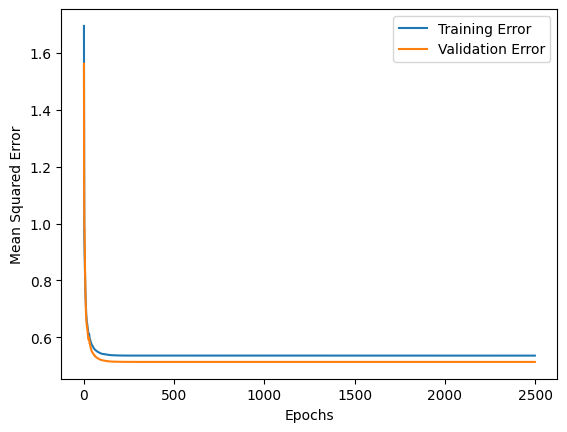

In [ ]:
# Plot the evolution of the training and validation errors
import matplotlib.pyplot as plt

plt.plot(loss_history[:, 0], label='Training Error')
plt.plot(loss_history[:, 1], label='Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


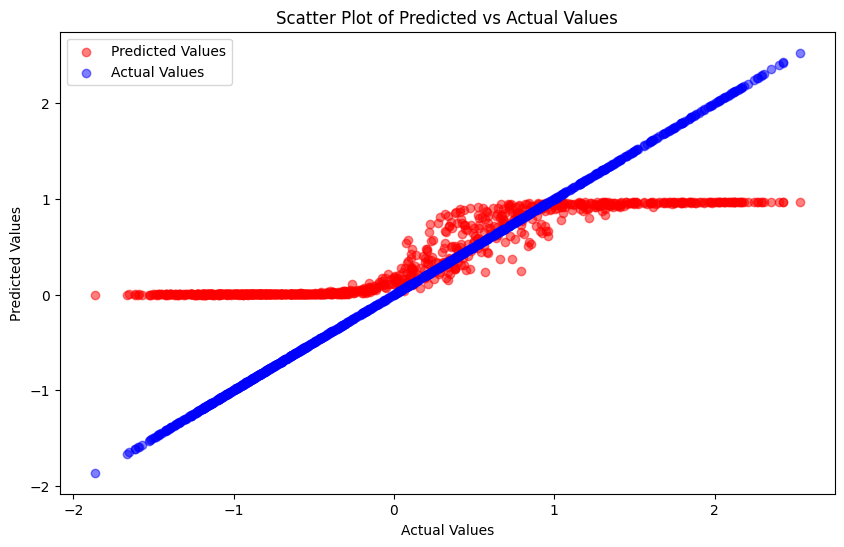

In [ ]:
# Scatter plot with diagonal line and separate colors for predicted and actual values
plt.figure(figsize=(10, 6))
predictions = nn.predict(X)
plt.scatter(y, predictions, color='red', label='Predicted Values', alpha=0.5)
plt.scatter(y, y, color='blue', label='Actual Values', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.legend()
plt.show()